In [1]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

%matplotlib inline
warnings.simplefilter('ignore')

# plt.rcParams.update({'font.size': 13,
#                      'xtick.labelsize' : 13,
#                      'ytick.labelsize' : 13})

In [2]:
#
BR3_DIC = pickle.load(open('./pkls/BR3_DIC_fullyear_mean.pkl', 'rb'))
BR3_TA = pickle.load(open('./pkls/BR3_TA_fullyear_mean.pkl', 'rb'))
PI9_DIC = pickle.load(open('./pkls/PI9_DIC_fullyear_mean.pkl', 'rb'))
PI9_TA = pickle.load(open('./pkls/PI9_TA_fullyear_mean.pkl', 'rb'))
csd = pickle.load(open('../pkls/cellsize_alg2.pkl','rb'))

# csd[np.where(BR3_DIC > 1e10)] = 0
# csd[np.where(BR3_DIC == np.nan)] = 0
# print(np.nanmean(BR3_DIC))
# print(np.nanmean(BR3_DIC))

# average = np.average(BR3_DIC, weights=csd)
# print(average)
take_csd = csd[csd>0]
take_BR3_DIC = BR3_DIC[csd>0]
take_BR3_TA = BR3_TA[csd>0]
take_PI9_DIC = PI9_DIC[csd>0]
take_PI9_TA = PI9_TA[csd>0]
# print(np.max(take_BR3_DIC))
# print(np.min(take_BR3_DIC))

print('TA')
average_TA_BR3 = np.average(take_BR3_TA, weights=take_csd)
print(average_TA_BR3)
average_TA_PI9 = np.average(take_PI9_TA, weights=take_csd)
print(average_TA_PI9)

print('DIC (BR/PI)')
average_DIC_BR3 = np.average(take_BR3_DIC, weights=take_csd)
print(average_DIC_BR3)
average_DIC_PI9 = np.average(take_PI9_DIC, weights=take_csd)
print(average_DIC_PI9)

print('TAminDIC (BR/PI)')

BR3_std_TAminDIC = np.sqrt(np.cov((take_BR3_TA-take_BR3_DIC), aweights=take_csd))
print(BR3_std_TAminDIC)
PI9_std_TAminDIC = np.sqrt(np.cov((take_PI9_TA-take_PI9_DIC), aweights=take_csd))
print(PI9_std_TAminDIC)

print('TAplsDIC (BR/PI)')
BR3_std_TAplsDIC = np.sqrt(np.cov((take_BR3_TA+take_BR3_DIC), aweights=take_csd))
print(BR3_std_TAplsDIC)
PI9_std_TAplsDIC = np.sqrt(np.cov((take_PI9_TA+take_PI9_DIC), aweights=take_csd))
print(PI9_std_TAplsDIC)


# average_TA_BR3
# average_DIC_BR3
# BR3_std_TAminDIC
# BR3_std_TAplsDIC
# average_TA_PI9
# average_DIC_PI9
# PI9_std_TAminDIC
# PI9_std_TAplsDIC

TA
2147.3380047551364
2150.8990132582526
DIC (BR/PI)
2082.4193076366128
2048.0739471352395
TAminDIC (BR/PI)
36.36653382896031
35.70699183440908
TAplsDIC (BR/PI)
170.47577244109488
169.88546358635722


In [3]:
np.linspace(700, 2420, 87)

array([ 700.,  720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,
        880.,  900.,  920.,  940.,  960.,  980., 1000., 1020., 1040.,
       1060., 1080., 1100., 1120., 1140., 1160., 1180., 1200., 1220.,
       1240., 1260., 1280., 1300., 1320., 1340., 1360., 1380., 1400.,
       1420., 1440., 1460., 1480., 1500., 1520., 1540., 1560., 1580.,
       1600., 1620., 1640., 1660., 1680., 1700., 1720., 1740., 1760.,
       1780., 1800., 1820., 1840., 1860., 1880., 1900., 1920., 1940.,
       1960., 1980., 2000., 2020., 2040., 2060., 2080., 2100., 2120.,
       2140., 2160., 2180., 2200., 2220., 2240., 2260., 2280., 2300.,
       2320., 2340., 2360., 2380., 2400., 2420.])

In [4]:
tbins = [np.linspace(700, 2420, 86), np.linspace(700, 2400, 86)]


In [5]:
# # 2D weighted histogram

# bins = np.linspace(700., 2420., 97)
# tbins = [np.linspace(700, 2420, 87), np.linspace(700, 2420, 87)]

# h, xe, ye = np.histogram2d(take_PI9_DIC, take_PI9_TA, bins=bins,
#                            weights=take_csd)

# h[h==0] = np.nan
# fig, ax = plt.subplots(1, 1, subplot_kw={'aspect': 'equal'})
# # ax.hold(True)
# scaled_h = h/(np.nansum(h))
# # w = ax.imshow(scaled_h*100, cmap=cm.matter, interpolation='nearest',
# #           origin='lower', vmin=0, vmax = 10)

# im = ax.pcolormesh(bins, bins,scaled_h, cmap=cm.matter,\
#                    alpha = 1,)

# # ax.axhline(8., ls='--', lw=2, c='w')
# # ax.axvline(8., ls='--', lw=2, c='w')
# plt.colorbar(w)
# plt.show()

In [6]:
# tbins = [np.linspace(700, 2420, 87), np.linspace(700, 2420, 87)]


# def map_hist(x, y, h, bins):
#     xi = np.digitize(x, bins[0]) - 1
#     yi = np.digitize(y, bins[1]) - 1
#     inds = np.ravel_multi_index((xi, yi),
#                                 (len(bins[0]) - 1, len(bins[1]) - 1),
#                                 mode='clip')
#     vals = h.flatten()[inds]
#     bads = ((x < bins[0][0]) | (x > bins[0][-1]) |
#             (y < bins[1][0]) | (y > bins[1][-1]))
#     vals[bads] = np.NaN
#     return vals



# x = take_PI9_DIC; y = take_PI9_TA;
# tweights = take_csd
# h, xe, ye = np.histogram2d(x, y, bins=tbins,
#                            weights=tweights)
# bins = (xe, ye)
# dens = map_hist(x, y, h, bins=(xe, ye))
# mode = 'mountain'
# # if dens_func is not None:
# #     dens = dens_func(dens)
# iorder = slice(None)  # No ordering by default
# if mode == 'mountain':
#     iorder = np.argsort(dens)
# elif mode == 'valley':
#     iorder = np.argsort(dens)[::-1]
# x_PI = x[iorder]
# y_PI = y[iorder]
# dens_PI = dens[iorder]

# x = take_BR3_DIC; y = take_BR3_TA;
# tweights = take_csd
# h, xe, ye = np.histogram2d(x, y, bins=tbins,
#                            weights=tweights)
# bins = (xe, ye)
# dens = map_hist(x, y, h, bins=(xe, ye))
# mode = 'mountain'
# # if dens_func is not None:
# #     dens = dens_func(dens)
# iorder = slice(None)  # No ordering by default
# if mode == 'mountain':
#     iorder = np.argsort(dens)
# elif mode == 'valley':
#     iorder = np.argsort(dens)[::-1]
# x_BR = x[iorder]
# y_BR = y[iorder]
# dens_BR = dens[iorder]


# pickle.dump(x_BR, open("./pkls/x_BR.pkl", 'wb'))
# pickle.dump(y_BR, open("./pkls/y_BR.pkl", 'wb'))
# pickle.dump(dens_BR, open("./pkls/dens_BR.pkl", 'wb'))

# pickle.dump(x_PI, open("./pkls/x_PI.pkl", 'wb'))
# pickle.dump(y_PI, open("./pkls/y_PI.pkl", 'wb'))
# pickle.dump(dens_PI, open("./pkls/dens_PI.pkl", 'wb'))

In [7]:
x_BR = pickle.load(open('./pkls/x_BR.pkl', 'rb'))
y_BR = pickle.load(open('./pkls/y_BR.pkl', 'rb'))
dens_BR = pickle.load(open('./pkls/dens_BR.pkl', 'rb'))
x_PI = pickle.load(open('./pkls/x_PI.pkl', 'rb'))
y_PI = pickle.load(open('./pkls/y_PI.pkl', 'rb'))
dens_PI = pickle.load(open('./pkls/dens_PI.pkl', 'rb'))

In [8]:
print(np.shape(x_BR))
print(np.min(dens_PI/np.nansum(dens_PI)))
print(np.min(dens_BR/np.nansum(dens_BR)))
print(np.shape(dens_PI))

print(np.min(x_BR))

(2103152,)
3.0316555055057976e-12
3.490860162528384e-12
(2103152,)
756.673454890839


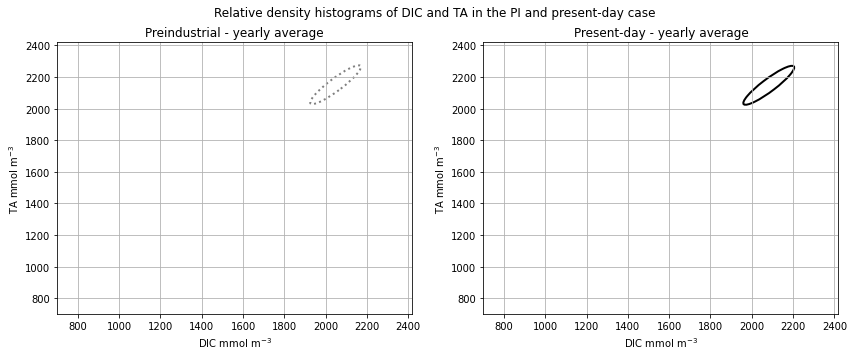

In [9]:
from matplotlib.patches import Ellipse

plotbois = False
ms = 12
#https://stackoverflow.com/questions/40594520/off-centered-weighted-numpy-histogram2d

# plt.hist2d(take_BR3_DIC,take_BR3_TA,weights=take_csd, bins=[np.linspace(1700, 2400, 71),
#                             np.linspace(1700, 2400, 71)])

fact = 1
fig, axs = plt.subplots(1, 2, figsize=[14*fact, 5*fact],
                            gridspec_kw=dict(hspace=0.5))

# axs = axs.ravel()
# scatter_hist2d(take_BR3_DIC, take_BR3_TA, bins=[np.linspace(1700, 2400, 71),
#                             np.linspace(1700, 2400, 71)], ax=axs[0], s=5)
# plt.colorbar()


if plotbois:
    w = axs[0].scatter(x_PI, y_PI,
                      s=5, c=dens_PI/np.nansum(dens_PI)*100,
                      edgecolors=None, cmap = cm.matter,
                      marker='o')

    plt.colorbar(w, ax = axs[0], label = 'relative density of points \n (% of distribution)')

    w = axs[1].scatter(x_BR, y_BR,
                      s=5, c=dens_BR/np.nansum(dens_BR)*100,
                      edgecolors=None, cmap = cm.matter,
                      marker='o')

    plt.colorbar(w, ax = axs[1], label = 'relative density of points \n (% of distribution)')



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = ':')
axs[0].add_patch(ellipse)

#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)
#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')




for i in range(0,2):
    
    axs[i].set_xlim([700,2420])
    axs[i].set_ylim([700,2420])
    axs[i].grid()
    axs[i].set_xlabel('DIC mmol m$^{-3}$')
    axs[i].set_ylabel('TA mmol m$^{-3}$')
    axs[0].set_title('Preindustrial - yearly average')
    axs[1].set_title('Present-day - yearly average')
    
plt.suptitle('Relative density histograms of DIC and TA in the PI and present-day case')
plt.tight_layout()

### add in our favourite lines

In [10]:
def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = np.zeros_like(tdic_A)
    
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC, OmegaA_A

# t_omega_DIC, t_beta_DIC, t_gammaDIC, t_OmegaA_A = \
# calculate_Egleston_factors\
# (tTEMP, tSAL, tALK*1e-3, tDIC*1e-3, tPRES, 0.01)


In [11]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 
tcmap = cm.thermal

#salinity 0-35
#
tsiz = 181
S = np.zeros([tsiz,tsiz])
T = np.zeros([tsiz,tsiz])
TA = np.zeros([tsiz,tsiz])
DIC = np.zeros([tsiz,tsiz])


S[:] = 30
T[:] = 10

for i in range(0,tsiz):
    DIC[:,i] = 700 + 10*i
for i in range(0,tsiz):
    TA[i,:] = 700 + 10*i


DIC_ar = DIC[0,:]
TA_ar = TA[:,0]  
    
print(DIC_ar)
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-3
TAr = np.ravel(TA) * 1e-3
del_dic = 10 * 1e-3
zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=zero+1, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

pH,pco2,fco2,co2_B,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(tsiz,tsiz)
OmegaAr_vTD = OmegaA.reshape(tsiz,tsiz)

#def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

omega_DIC, beta_DIC, gamma_DIC, OmegaA_A = \
calculate_Egleston_factors(Tr, Sr, TAr, DICr, zero, del_dic)
    #return omega_DIC, beta_DIC, gamma_DIC, OmegaA_A
omega_DIC_r= omega_DIC.reshape(tsiz,tsiz)
OmegaA_A_r = OmegaA_A.reshape(tsiz,tsiz)

[ 700.  710.  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.
  820.  830.  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.
  940.  950.  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050.
 1060. 1070. 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170.
 1180. 1190. 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290.
 1300. 1310. 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410.
 1420. 1430. 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530.
 1540. 1550. 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630. 1640. 1650.
 1660. 1670. 1680. 1690. 1700. 1710. 1720. 1730. 1740. 1750. 1760. 1770.
 1780. 1790. 1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890.
 1900. 1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010.
 2020. 2030. 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110. 2120. 2130.
 2140. 2150. 2160. 2170. 2180. 2190. 2200. 2210. 2220. 2230. 2240. 2250.
 2260. 2270. 2280. 2290. 2300. 2310. 2320. 2330. 23

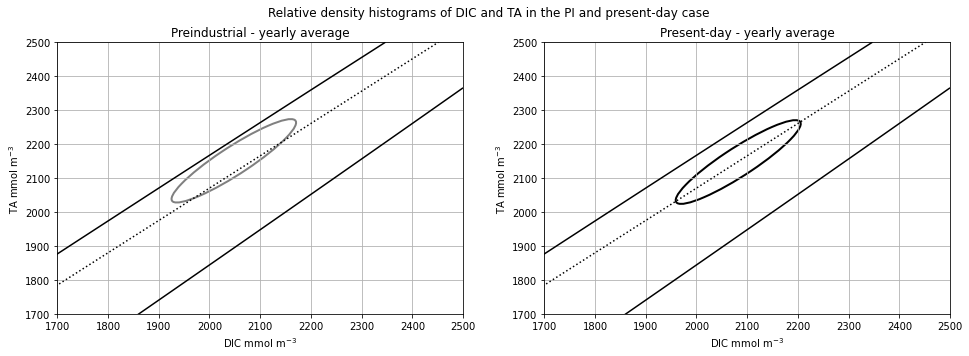

In [12]:
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plotbois = False
ms = 12

fact = 1
fig, axs = plt.subplots(1, 2, figsize=[16*fact, 5*fact],
                            gridspec_kw=dict(hspace=0.5))


if plotbois:
    w = axs[0].scatter(x_PI, y_PI,
                      s=5, c=dens_PI/np.nansum(dens_PI)*100,
                      edgecolors=None, cmap = cm.matter, vmin = 0, vmax = 0.00035,
                      marker='o')

    plt.colorbar(w, ax = axs[0],\
                 label = 'relative density of points (% of distribution)')

    w = axs[1].scatter(x_BR, y_BR,
                      s=5, c=dens_BR/np.nansum(dens_BR)*100,
                      edgecolors=None, cmap = cm.matter, vmin = 0, vmax = 0.00035,
                      marker='o')

    plt.colorbar(w, ax = axs[1], \
                 label = 'relative density of points (% of distribution)')



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = '-')
axs[0].add_patch(ellipse)

#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)
#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')



for i in range(0,2):
    
    axs[i].set_xlim([1700,2500])
    axs[i].set_ylim([1700,2500])
    axs[i].grid()
    axs[i].set_xlabel('DIC mmol m$^{-3}$')
    axs[i].set_ylabel('TA mmol m$^{-3}$')
    axs[0].set_title('Preindustrial - yearly average')
    axs[1].set_title('Present-day - yearly average')
    tend = tsiz
    X = DIC_ar[0:tend]
    Y = TA_ar[0:tend]
    omega_lev = 0.2
    
    axs[i].contour(X, Y, -omega_DIC_r[0:tend,0:tend], levels=[omega_lev], colors = 'k')
    axs[i].contour(X, Y, OmegaAr_vTD[0:tend,0:tend], levels=[1], linestyles = 'dotted', colors = 'k' )
    
    
    
plt.suptitle('Relative density histograms of DIC and TA in the PI and present-day case')
plt.tight_layout()

In [13]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 
tcmap = cm.thermal

#salinity 0-35
#
tsiz = 181
S = np.zeros([tsiz,tsiz])
T = np.zeros([tsiz,tsiz])
TA = np.zeros([tsiz,tsiz])
DIC = np.zeros([tsiz,tsiz])


S[:] = 30
T[:] = 10

for i in range(0,tsiz):
    DIC[:,i] = 700 + 10*i
for i in range(0,tsiz):
    TA[i,:] = 700 + 10*i


DIC_ar = DIC[0,:]
TA_ar = TA[:,0]  
    
print(DIC_ar)
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-3
TAr = np.ravel(TA) * 1e-3
del_dic = 10 * 1e-3
zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=zero+1, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

pH,pco2,fco2,co2_B,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(tsiz,tsiz)
OmegaAr_vTD = OmegaA.reshape(tsiz,tsiz)

#def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

omega_DIC, beta_DIC, gamma_DIC, OmegaA_A = \
calculate_Egleston_factors(Tr, Sr, TAr, DICr, zero, del_dic)
    #return omega_DIC, beta_DIC, gamma_DIC, OmegaA_A
omega_DIC_r= omega_DIC.reshape(tsiz,tsiz)
OmegaA_A_r = OmegaA_A.reshape(tsiz,tsiz)

[ 700.  710.  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.
  820.  830.  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.
  940.  950.  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050.
 1060. 1070. 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170.
 1180. 1190. 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290.
 1300. 1310. 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410.
 1420. 1430. 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530.
 1540. 1550. 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630. 1640. 1650.
 1660. 1670. 1680. 1690. 1700. 1710. 1720. 1730. 1740. 1750. 1760. 1770.
 1780. 1790. 1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890.
 1900. 1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010.
 2020. 2030. 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110. 2120. 2130.
 2140. 2150. 2160. 2170. 2180. 2190. 2200. 2210. 2220. 2230. 2240. 2250.
 2260. 2270. 2280. 2290. 2300. 2310. 2320. 2330. 23

(86, 86)
0.02646117633551827
(86, 86)
0.027949717132667896


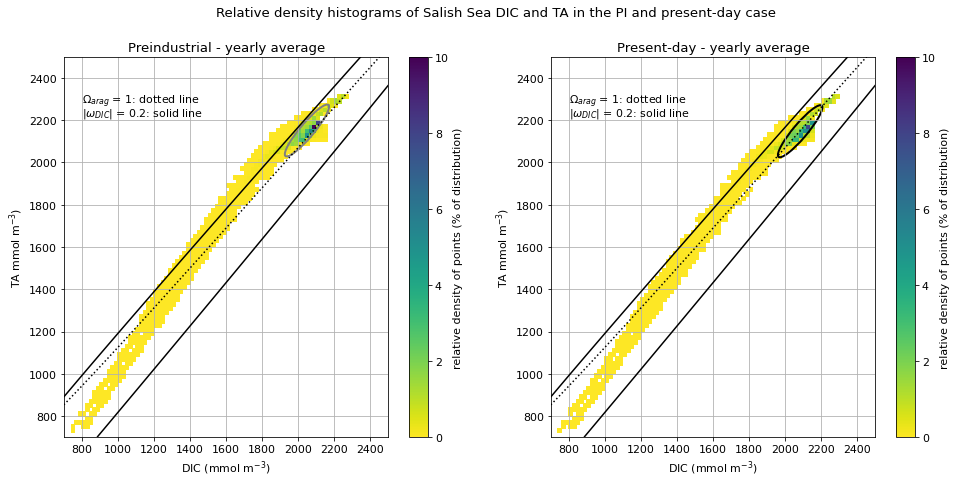

In [14]:
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'
tcm = cm.algae
tcm = 'viridis_r'

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plotbois = True
ms = 12

plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 11}


fact = 1
fig, axs = plt.subplots(1, 2, figsize=[16*fact, 7*fact],
                            gridspec_kw=dict(hspace=0.5))


if plotbois:

    bins = np.linspace(700., 2420., 87)
    h, xe, ye = np.histogram2d(take_PI9_DIC, take_PI9_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    im = axs[0].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 10)

    plt.colorbar(im, ax = axs[0],\
                 label = 'relative density of points (% of distribution)')
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    
    h, xe, ye = np.histogram2d(take_BR3_DIC, take_BR3_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    im = axs[1].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 10)
    
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    plt.colorbar(im, ax = axs[1], \
                 label = 'relative density of points (% of distribution)')



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = '-')
axs[0].add_patch(ellipse)
# axs[2].add_patch(ellipse)

#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)
# axs[3].add_patch(ellipse)
#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')

for i in range(0,2):
    
    axs[i].set_xlim([700,2500])
    axs[i].set_ylim([700,2500])
    axs[i].grid()
    axs[i].set_xlabel('DIC (mmol m$^{-3}$)')
    axs[i].set_ylabel('TA mmol m$^{-3}$)')
    axs[0].set_title('Preindustrial - yearly average')
    axs[1].set_title('Present-day - yearly average')
    tend = tsiz
    X = DIC_ar[0:tend]
    Y = TA_ar[0:tend]
    omega_lev = 0.2
    
    omega_DIC_r[80:tend, 0:50] = np.nan
    
    axs[i].contour(X, Y, -omega_DIC_r[0:tend,0:tend], levels=[0.2], colors = 'k')
    axs[i].contour(X, Y, OmegaAr_vTD[0:tend,0:tend], levels=[1], linestyles = 'dotted', colors = 'k' )
    
    axs[i].text(800, 2280, '$\Omega_{arag}$ = 1: dotted line')
    axs[i].text(800, 2220, '|$\omega_{DIC}$| = 0.2: solid line')
    
plt.suptitle('Relative density histograms of Salish Sea DIC and TA in the PI and present-day case')
plt.tight_layout()


In [15]:
# ### FIND TA

# jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
# jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
# jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

# cs_x = 250; cs_y = 500; cs_col = 'royalblue'
# cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
# cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'

# reload(ebmBOX)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI9/' #where under directory tree do we find ncs 
# varname = 'total_alkalinity' #name of variable



# fname = pkldir + 'PI9_TA_means_cs_BOX'
# y = cs_y; x = cs_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_TA_means_ns2_BOX'
# y = ns2_y; x = ns2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_TA_means_haro_BOX'
# y = haro_y; x = haro_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_TA_means_jdf_BOX'
# y = jdf_y; x = jdf_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )


In [16]:
# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'MAIN/BR_3rd_2015/' #where under directory tree do we find ncs 
# varname = 'total_alkalinity' #name of variable



# fname = pkldir + 'BR3_TA_means_cs_BOX'
# y = cs_y; x = cs_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'BR3_TA_means_ns2_BOX'
# y = ns2_y; x = ns2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'BR3_TA_means_haro_BOX'
# y = haro_y; x = haro_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'BR3_TA_means_jdf_BOX'
# y = jdf_y; x = jdf_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

In [17]:

BR3_DIC_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl', 'rb'))
BR3_DIC_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl', 'rb'))
BR3_DIC_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl', 'rb'))
BR3_DIC_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl', 'rb'))

pdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'

BR3_TA_cs = pickle.load(open(f'{pdir}/BR3_TA_means_cs_BOX.pkl', 'rb'))
BR3_TA_ns2 = pickle.load(open(f'{pdir}/BR3_TA_means_ns2_BOX.pkl', 'rb'))
BR3_TA_jdf = pickle.load(open(f'{pdir}/BR3_TA_means_jdf_BOX.pkl', 'rb'))
BR3_TA_haro = pickle.load(open(f'{pdir}/BR3_TA_means_haro_BOX.pkl', 'rb'))


PI9_DIC_cs = pickle.load(open('../pkls/PI9_DIC_means_cs_BOX.pkl', 'rb'))
PI9_DIC_ns2 = pickle.load(open('../pkls/PI9_DIC_means_ns2_BOX.pkl', 'rb'))
PI9_DIC_jdf = pickle.load(open('../pkls/PI9_DIC_means_jdf_BOX.pkl', 'rb'))
PI9_DIC_haro = pickle.load(open('../pkls/PI9_DIC_means_haro_BOX.pkl', 'rb'))

pdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'

PI9_TA_cs = pickle.load(open(f'{pdir}/PI9_TA_means_cs_BOX.pkl', 'rb'))
PI9_TA_ns2 = pickle.load(open(f'{pdir}/PI9_TA_means_ns2_BOX.pkl', 'rb'))
PI9_TA_jdf = pickle.load(open(f'{pdir}/PI9_TA_means_jdf_BOX.pkl', 'rb'))
PI9_TA_haro = pickle.load(open(f'{pdir}/PI9_TA_means_haro_BOX.pkl', 'rb'))


(86, 86)
0.02646117633551827
(86, 86)
0.027949717132667896


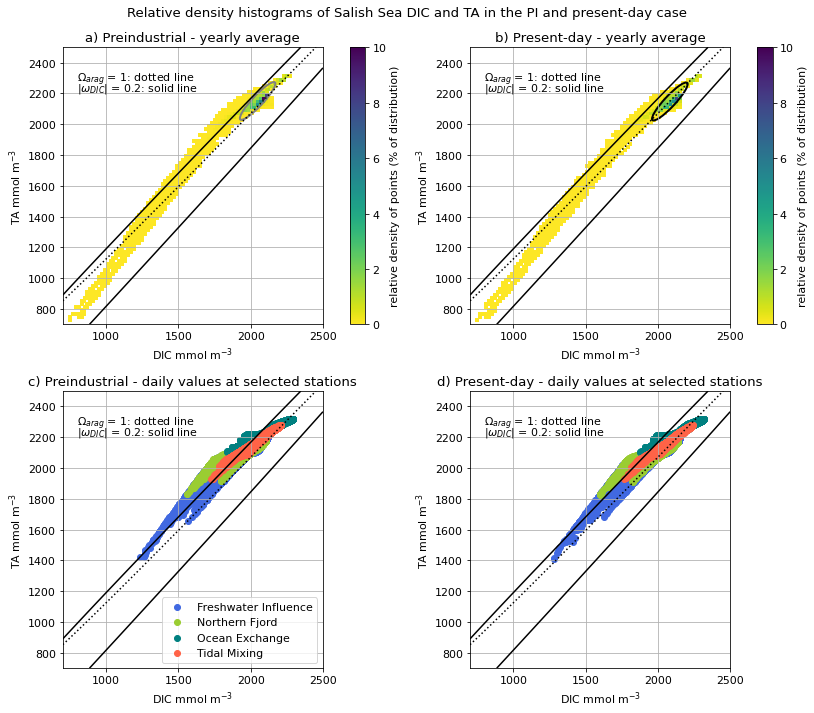

In [18]:
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

tcm = cm.algae
tcm = 'viridis_r'

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plotbois = True
ms = 12

plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 11}


fact = 0.7
fig, axs = plt.subplots(2, 2, figsize=[16*fact, 14*fact], constrained_layout=True,
                            gridspec_kw=dict(hspace=0.5))

axs = axs.ravel()
if plotbois:

    bins = np.linspace(700., 2420., 87)
    h, xe, ye = np.histogram2d(take_PI9_DIC, take_PI9_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    im = axs[0].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 10)

    plt.colorbar(im, ax = axs[0],\
                 label = 'relative density of points (% of distribution)')
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    
    h, xe, ye = np.histogram2d(take_BR3_DIC, take_BR3_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    im = axs[1].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 10)
    
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    plt.colorbar(im, ax = axs[1], \
                 label = 'relative density of points (% of distribution)')



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = '-')
axs[0].add_patch(ellipse)
# axs[2].add_patch(ellipse)
#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)


#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')


axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[3].scatter(BR3_DIC_cs, BR3_TA_cs, marker = 'o', color = cs_col)
axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[3].scatter(BR3_DIC_ns2, BR3_TA_ns2, marker = 'o', color = ns2_col)
axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[3].scatter(BR3_DIC_jdf, BR3_TA_jdf, marker = 'o', color = jdf_col)
axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[3].scatter(BR3_DIC_haro, BR3_TA_haro, marker = 'o', color = haro_col)


# axs[3].add_patch(ellipse)
for i in range(0,4):
    
    axs[i].set_xlim([700,2500])
    axs[i].set_ylim([700,2500])
    axs[i].grid()
    axs[i].set_xlabel('DIC mmol m$^{-3}$')
    axs[i].set_ylabel('TA mmol m$^{-3}$')
    axs[0].set_title('a) Preindustrial - yearly average')
    axs[1].set_title('b) Present-day - yearly average')
    
    axs[2].set_title('c) Preindustrial - daily values at selected stations')
    axs[3].set_title('d) Present-day - daily values at selected stations')
    axs[2].legend(loc = 'lower right')
    tend = tsiz
    X = DIC_ar[0:tend]
    Y = TA_ar[0:tend]
    omega_lev = 0.2
    
    omega_DIC_r[80:tend, 0:50] = np.nan
    
    axs[i].contour(X, Y, -omega_DIC_r[0:tend,0:tend], levels=[0.2], colors = 'k')
    axs[i].contour(X, Y, OmegaAr_vTD[0:tend,0:tend], levels=[1], linestyles = 'dotted', colors = 'k' )
    
    axs[i].text(800, 2280, '$\Omega_{arag}$ = 1: dotted line')
    axs[i].text(800, 2220, '|$\omega_{DIC}$| = 0.2: solid line')
    
    
    
    
plt.suptitle('Relative density histograms of Salish Sea DIC and TA in the PI and present-day case')
plt.tight_layout()


In [19]:
bins[0:66]

array([ 700.,  720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,
        880.,  900.,  920.,  940.,  960.,  980., 1000., 1020., 1040.,
       1060., 1080., 1100., 1120., 1140., 1160., 1180., 1200., 1220.,
       1240., 1260., 1280., 1300., 1320., 1340., 1360., 1380., 1400.,
       1420., 1440., 1460., 1480., 1500., 1520., 1540., 1560., 1580.,
       1600., 1620., 1640., 1660., 1680., 1700., 1720., 1740., 1760.,
       1780., 1800., 1820., 1840., 1860., 1880., 1900., 1920., 1940.,
       1960., 1980., 2000.])

(86, 86)
0.02646117633551827
(86, 86)
0.027949717132667896


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(1200.0, 2400.0)

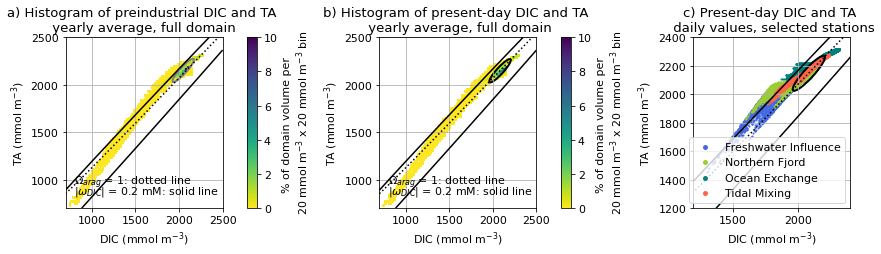

In [20]:



from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

tcm = cm.algae
tcm = 'viridis_r'

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plotbois = True
ms = 12

plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 11}

ms = 1
tas = 60

fact = 1.07
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(11*fact,3.2*fact))

axs = axs.ravel()
if plotbois:

    bins = np.linspace(700., 2420., 87)
    h, xe, ye = np.histogram2d(take_PI9_DIC, take_PI9_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    im = axs[0].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 10)
#% of domain volume per 50 mmol/m3 x 50 mmol/m3 bin
    plt.colorbar(im, ax = axs[0],\
                 label = '% of domain volume per \n 20 mmol m$^{-3}$ x 20 mmol m$^{-3}$ bin', aspect = tas)
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    
    h, xe, ye = np.histogram2d(take_BR3_DIC, take_BR3_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    im = axs[1].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 10)
    
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    plt.colorbar(im, ax = axs[1], \
                 label = '% of domain volume per \n 20 mmol m$^{-3}$ x 20 mmol m$^{-3}$ bin', aspect = tas)



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = '-')
axs[0].add_patch(ellipse)

#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)
ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[2].add_patch(ellipse)
#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')


#axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[2].scatter(BR3_DIC_cs, BR3_TA_cs, s = ms, marker = 'o', color = cs_col)
#axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[2].scatter(BR3_DIC_ns2, BR3_TA_ns2, s = ms, marker = 'o', color = ns2_col)
#axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[2].scatter(BR3_DIC_jdf, BR3_TA_jdf,s = ms, marker = 'o', color = jdf_col)
#axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[2].scatter(BR3_DIC_haro, BR3_TA_haro, s = ms, marker = 'o', color = haro_col)

for i in range(0,3):
    
    axs[i].set_xlim([700,2500])
    axs[i].set_ylim([700,2500])
    axs[i].grid()
    axs[i].set_xlabel('DIC (mmol m$^{-3}$)')
    axs[i].set_ylabel('TA (mmol m$^{-3}$)')
    axs[0].set_title('a) Histogram of preindustrial DIC and TA \n yearly average, full domain ')
    axs[1].set_title('b) Histogram of present-day DIC and TA \n yearly average, full domain')
    
    #axs[2].set_title('Preindustrial - daily values at selected stations')
    axs[2].set_title('c) Present-day DIC and TA \n daily values, selected stations')
    axs[2].legend(loc = 'lower right')
    tend = tsiz
    X = DIC_ar[0:tend]
    Y = TA_ar[0:tend]
    omega_lev = 0.2
    
    omega_DIC_r[80:tend, 0:50] = np.nan
    
    axs[i].contour(X, Y, -omega_DIC_r[0:tend,0:tend], levels=[0.2], colors = 'k')
    axs[i].contour(X, Y, OmegaAr_vTD[0:tend,0:tend], levels=[1], linestyles = 'dotted', colors = 'k' )
    
for i in range(0,2):
    axs[i].text(800, 950, '$\Omega_{arag}$ = 1: dotted line')
    axs[i].text(800, 850, '|$\omega_{DIC}$| = 0.2 mM: solid line')
    
ms = 15
#axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = cs_col, label = 'Freshwater Influence')
#axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = ns2_col, label = 'Northern Fjord')
#axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[2].scatter(1, 1,s = ms, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
#axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = haro_col, label = 'Tidal Mixing')

axs[2].legend(loc = 'lower right')

axs[2].set_xlim([1200,2400])
axs[2].set_ylim([1200,2400])    
    
#plt.suptitle('Relative density histograms of Salish Sea DIC and TA in the PI and present-day case')
#plt.tight_layout()


NameError: name 'omg_andrew_PI' is not defined

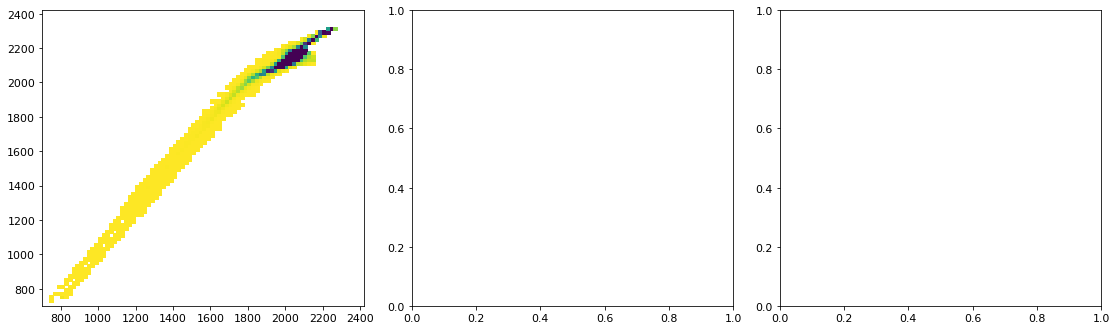

In [31]:



from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

tcm = cm.algae
tcm = 'viridis_r'

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plotbois = True
ms = 12

plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 11}

ms = 1
tas = 60

fact = 1.4
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(11*fact,3.2*fact))

axs = axs.ravel()
if plotbois:

    bins = np.linspace(700., 2420., 87)
    h, xe, ye = np.histogram2d(take_PI9_DIC, take_PI9_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    scaled_h_PI = scaled_h 
    im = axs[0].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 1)
    im = axs[0].pcolormesh(bins, bins,omg_andrew_PI, cmap=tcm,\
                            alpha = 1, vmin = 0, vmax = 1)    
    plt.colorbar(im, ax = axs[0],\
                 label = 'relative density of points (% of distribution)', aspect = tas)
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    
    h, xe, ye = np.histogram2d(take_BR3_DIC, take_BR3_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    scaled_h_BR = scaled_h 
    im = axs[1].pcolormesh(bins, bins,scaled_h*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 1)
#     im = axs[0].pcolormesh(bins, bins,omg_andrew_PI, cmap=tcm,\
#                             alpha = 1, vmin = 0, vmax = 1)
    
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    plt.colorbar(im, ax = axs[1], \
                 label = 'relative density of points (% of distribution)', aspect = tas)



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = '-')
axs[0].add_patch(ellipse)

#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)
ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[2].add_patch(ellipse)
#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')


#axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[2].scatter(BR3_DIC_cs, BR3_TA_cs, s = ms, marker = 'o', color = cs_col)
#axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[2].scatter(BR3_DIC_ns2, BR3_TA_ns2, s = ms, marker = 'o', color = ns2_col)
#axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[2].scatter(BR3_DIC_jdf, BR3_TA_jdf,s = ms, marker = 'o', color = jdf_col)
#axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[2].scatter(BR3_DIC_haro, BR3_TA_haro, s = ms, marker = 'o', color = haro_col)

for i in range(0,3):
    
    axs[i].set_xlim([700,2500])
    axs[i].set_ylim([700,2500])
    axs[i].grid()
    axs[i].set_xlabel('DIC mmol m$^{-3}$')
    axs[i].set_ylabel('TA mmol m$^{-3}$')
    axs[0].set_title('a) Histogram of preindustrial DIC and TA \n yearly average, full domain ')
    axs[1].set_title('b) Histogram of present-day DIC and TA \n yearly average, full domain')
    
    #axs[2].set_title('Preindustrial - daily values at selected stations')
    axs[2].set_title('c) Present-day DIC and TA \n daily values, selected stations')
    axs[2].legend(loc = 'lower right')
    tend = tsiz
    X = DIC_ar[0:tend]
    Y = TA_ar[0:tend]
    omega_lev = 0.2
    
    omega_DIC_r[80:tend, 0:50] = np.nan
    
    axs[i].contour(X, Y, -omega_DIC_r[0:tend,0:tend], levels=[0.2], colors = 'k')
    axs[i].contour(X, Y, OmegaAr_vTD[0:tend,0:tend], levels=[1], linestyles = 'dotted', colors = 'k' )
    
for i in range(0,2):
    axs[i].text(800, 2280, '$\Omega_{arag}$ = 1: dotted line')
    axs[i].text(800, 2220, '|$\omega_{DIC}$| = 0.2 mM: solid line')
    
ms = 15
#axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = cs_col, label = 'Freshwater Influence')
#axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = ns2_col, label = 'Northern Fjord')
#axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[2].scatter(1, 1,s = ms, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
#axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = haro_col, label = 'Tidal Mixing')

axs[2].legend(loc = 'lower right')

axs[2].set_xlim([1900,2300])
axs[2].set_ylim([2000,2300])    
axs[1].set_xlim([1900,2300])
axs[1].set_ylim([2000,2300])   
axs[0].set_xlim([1900,2300])
axs[0].set_ylim([2000,2300])       
#plt.suptitle('Relative density histograms of Salish Sea DIC and TA in the PI and present-day case')
#plt.tight_layout()


In [30]:
# np.shape(scaled_h_BR)
# print(bins[65])
# omg_andrew_PI = np.zeros_like(scaled_h_BR)
# omg_andrew_PI[61,66:68] = 1
# omg_andrew_PI[62,67:69] = 1

NameError: name 'scaled_h_BR' is not defined

In [23]:
np.shape(scaled_h_BR)
print(bins[65])
omg_andrew_PI = np.zeros_like(scaled_h_BR)
omg_andrew_BR = np.zeros_like(scaled_h_BR)
omg_andrew_PI[61,66:69] = 1
omg_andrew_PI[62,66:70] = 1
omg_andrew_PI[63,67:72] = 1
omg_andrew_PI[64,67:73] = 1
omg_andrew_PI[65,68:74] = 1
omg_andrew_PI[66,69:75] = 1
omg_andrew_PI[67,70:76] = 1
omg_andrew_PI[68,71:77] = 1
omg_andrew_PI[69,72:77] = 1
omg_andrew_PI[70,73:78] = 1
omg_andrew_PI[71,74:79] = 1
omg_andrew_PI[72,75:79] = 1
omg_andrew_PI[73,77:79] = 1

omg_andrew_BR[61+2,66:69] = 1
omg_andrew_BR[62+2,66:70] = 1
omg_andrew_BR[63+2,67:72] = 1
omg_andrew_BR[64+2,67:73] = 1
omg_andrew_BR[65+2,68:74] = 1
omg_andrew_BR[66+2,69:75] = 1
omg_andrew_BR[67+2,70:76] = 1
omg_andrew_BR[68+2,71:77] = 1
omg_andrew_BR[69+2,72:77] = 1
omg_andrew_BR[70+2,73:78] = 1
omg_andrew_BR[71+2,74:79] = 1
omg_andrew_BR[72+2,75:79] = 1
omg_andrew_BR[73+2,77:79] = 1

from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker

tcm = cm.algae
tcm = 'viridis_r'

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

plotbois = True
ms = 12

plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 11}

ms = 1
tas = 60

fact = 1.4
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(11*fact,3.2*fact))

axs = axs.ravel()
if plotbois:

    bins = np.linspace(700., 2420., 87)
    h, xe, ye = np.histogram2d(take_PI9_DIC, take_PI9_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h_PI = np.transpose(scaled_h)
    omg_andrew_PI = np.transpose(omg_andrew_PI)
    im = axs[0].pcolormesh(bins, bins,scaled_h_PI*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 1)
    im = axs[0].pcolormesh(bins, bins,omg_andrew_PI, cmap=tcm,\
                            alpha = 1, vmin = 0, vmax = 1)    
    plt.colorbar(im, ax = axs[0],\
                 label = 'relative density of points (% of distribution)', aspect = tas)
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    
    h, xe, ye = np.histogram2d(take_BR3_DIC, take_BR3_TA, bins=bins,
                               weights=take_csd)

    h[h==0] = np.nan
    scaled_h = h/(np.nansum(h))
    scaled_h = np.transpose(scaled_h)
    scaled_h_BR = scaled_h 
    im = axs[1].pcolormesh(bins, bins,scaled_h_BR*100, cmap=tcm,\
                       alpha = 1, vmin = 0, vmax = 1)
    omg_andrew_BR = np.transpose(omg_andrew_BR)
    im = axs[1].pcolormesh(bins, bins,omg_andrew_BR, cmap=tcm,\
                            alpha = 1, vmin = 0, vmax = 1)   
#     im = axs[0].pcolormesh(bins, bins,omg_andrew_PI, cmap=tcm,\
#                             alpha = 1, vmin = 0, vmax = 1)
    
    print(np.shape(scaled_h))
    print(np.nansum(scaled_h[0:66,0:66]))
    plt.colorbar(im, ax = axs[1], \
                 label = 'relative density of points (% of distribution)', aspect = tas)



x = average_DIC_PI9; y = average_TA_PI9

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*PI9_std_TAplsDIC, height=2*PI9_std_TAminDIC, angle = 45,
                        edgecolor='grey', fc='none', alpha = 1, lw=2, linestyle = '-')
axs[0].add_patch(ellipse)

#axs[0].plot(x,y, marker = '*', markersize = ms-5, color = 'lightgrey', linestyle = '', label = 'Salish Sea\n(this study, \n preindustrial)')

x = average_DIC_BR3; y = average_TA_BR3

ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[1].add_patch(ellipse)
ellipse = Ellipse(xy=(np.nanmean(x), np.nanmean(y)), width=2*BR3_std_TAplsDIC, height=2*BR3_std_TAminDIC, angle = 45,
                        edgecolor='k', fc='none', alpha = 1, lw=2)
axs[2].add_patch(ellipse)
#axs[1].plot(x,y, marker = '*', markersize = ms-5, color = 'k', linestyle = '', label = 'Salish Sea\n(this study, \n present-day)')


#axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[2].scatter(BR3_DIC_cs, BR3_TA_cs, s = ms, marker = 'o', color = cs_col)
#axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[2].scatter(BR3_DIC_ns2, BR3_TA_ns2, s = ms, marker = 'o', color = ns2_col)
#axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[2].scatter(BR3_DIC_jdf, BR3_TA_jdf,s = ms, marker = 'o', color = jdf_col)
#axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[2].scatter(BR3_DIC_haro, BR3_TA_haro, s = ms, marker = 'o', color = haro_col)

for i in range(0,3):
    
    axs[i].set_xlim([700,2500])
    axs[i].set_ylim([700,2500])
    axs[i].grid()
    axs[i].set_xlabel('DIC mmol m$^{-3}$')
    axs[i].set_ylabel('TA mmol m$^{-3}$')
    axs[0].set_title('a) Histogram of preindustrial DIC and TA \n yearly average, full domain ')
    axs[1].set_title('b) Histogram of present-day DIC and TA \n yearly average, full domain')
    
    #axs[2].set_title('Preindustrial - daily values at selected stations')
    axs[2].set_title('c) Present-day DIC and TA \n daily values, selected stations')
    axs[2].legend(loc = 'lower right')
    tend = tsiz
    X = DIC_ar[0:tend]
    Y = TA_ar[0:tend]
    omega_lev = 0.2
    
    omega_DIC_r[80:tend, 0:50] = np.nan
    
    axs[i].contour(X, Y, -omega_DIC_r[0:tend,0:tend], levels=[0.2], colors = 'k')
    axs[i].contour(X, Y, OmegaAr_vTD[0:tend,0:tend], levels=[1], linestyles = 'dotted', colors = 'k' )
    
for i in range(0,2):
    axs[i].text(800, 2280, '$\Omega_{arag}$ = 1: dotted line')
    axs[i].text(800, 2220, '|$\omega_{DIC}$| = 0.2 mM: solid line')
    
ms = 15
#axs[2].scatter(PI9_DIC_cs, PI9_TA_cs, marker = 'o', color = cs_col, label = 'Freshwater Influence')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = cs_col, label = 'Freshwater Influence')
#axs[2].scatter(PI9_DIC_ns2, PI9_TA_ns2, marker = 'o', color = ns2_col, label = 'Northern Fjord')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = ns2_col, label = 'Northern Fjord')
#axs[2].scatter(PI9_DIC_jdf, PI9_TA_jdf, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
axs[2].scatter(1, 1,s = ms, marker = 'o', color = jdf_col, label = 'Ocean Exchange')
#axs[2].scatter(PI9_DIC_haro, PI9_TA_haro, marker = 'o', color = haro_col, label = 'Tidal Mixing')
axs[2].scatter(1, 1, s = ms, marker = 'o', color = haro_col, label = 'Tidal Mixing')

axs[2].legend(loc = 'lower right')

axs[2].set_xlim([1900,2220])
axs[2].set_ylim([2000,2300])    
axs[1].set_xlim([1900,2220])
axs[1].set_ylim([2000,2300])   
axs[0].set_xlim([1900,2220])
axs[0].set_ylim([2000,2300])       
#plt.suptitle('Relative density histograms of Salish Sea DIC and TA in the PI and present-day case')
#plt.tight_layout()


NameError: name 'scaled_h_BR' is not defined

In [24]:
print(np.nansum(scaled_h_BR[omg_andrew_BR == 1]))
print(np.nansum(scaled_h_PI[omg_andrew_PI == 1]))

NameError: name 'scaled_h_BR' is not defined

In [25]:
import math
 
# Function to check the point
def checkpoint( h, k, x, y, a, b):
 
    # checking the equation of
    # ellipse with the given point
    p = ((math.pow((x - h), 2) // math.pow(a, 2)) +
         (math.pow((y - k), 2) // math.pow(b, 2)))
 
    return p
 
# Driver code
if __name__ == "__main__":
 
    h = 0
    k = 0
    x = 2
    y = 1
    a = 4
    b = 5
 
    if (checkpoint(h, k, x, y, a, b) > 1):
        print ("Outside")
 
    elif (checkpoint(h, k, x, y, a, b) == 1):
        print("On the ellipse")
 
    else:
        print("Inside")
 
# This code is contributed
# by ChitraNayal

Inside


In [26]:
ttemp = 10
tsal = 30
talk = 2200 * 1e-3
tdic_A = 950 * 1e-3
dep = 0
del_dic = 10 * 1e-3
calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)


omega_DIC, beta_DIC, gamma_DIC, OmegaA_A = 

SyntaxError: invalid syntax (<ipython-input-26-e278f0cf03ff>, line 10)

In [27]:
BR3_DIC = pickle.load(open('../pkls/BR3_sal_means_inletsIN.pkl', 'rb'))
print(np.shape(BR3_DIC))

print(np.nanmin(BR3_DIC))

(40, 365)
21.940126419067383


In [28]:
PI9_sal_mu = pickle.load(open('./pkls/PI9_sal_fullyear_mean.pkl', 'rb'))
print(np.shape(PI9_sal_mu))
PI9_sal_mu[PI9_sal_mu<1] = np.nan
PI9_sal_mu[PI9_sal_mu>100] = np.nan
print(np.nanmin(PI9_sal_mu))
print(np.nanmax(PI9_sal_mu))

(40, 898, 398)
1.000228008697815
33.93385963962503
